In [1]:
%%shell
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
pip install imblearn

     - 38.1MB 791kB/s
     |████████████████████████████████| 112kB 11.9MB/s 
     |████████████████████████████████| 1.1MB 15.6MB/s 
     |████████████████████████████████| 3.2MB 35.7MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 81kB 12.5MB/s 
     |████████████████████████████████| 296kB 43.5MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.13.0-py2.py3-none-any.whl size=245154 sha256=5d4225418f8f7f1628f3ed4c602f647e05d71990b2386dd125ad6106dd100ee9
  Stored in directory: /tmp/pip-ephem-wheel-cache-apj1qvvy/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=d6c423434a458ecffb1332c876606b4fa83a4fbe8b8e5b7469596494c3afc080
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha2

In [3]:
import pandas_profiling
import pandas as pd
from google.colab import drive
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn
import warnings
from random import sample
import numpy as np
from imblearn.combine import SMOTEENN
import imblearn
import keras
from keras.utils import np_utils
%matplotlib inline
class Insight(object):
    def __init__(self,**kwargs):
        print('\n\n***INSIGHTS INITIALIZATION***\n\n')
        self.__data_set=kwargs['data']
        self.__data_set=self.__data_set.sort_values(by=[kwargs['id']],ignore_index=True)
        self.__targets=self.__data_set[kwargs['target_column']]
        for i in self.__data_set.columns:
            if isinstance(self.__data_set[i][0],str)==True:
                self.__data_set[i]=preprocessing.LabelEncoder().fit_transform(self.__data_set[i])
        self.__treatments=self.__data_set[kwargs['treatment']]
        self.__covariates=self.__data_set.drop(kwargs['treatment']+[kwargs['id']]+[kwargs['target_column']],axis='columns')
    def baseline(self,with_imbalance=False):
        print('\n\n***BASELINES***\n\n')
        features=pd.concat([self.__covariates,self.__treatments],axis='columns')
        features=StandardScaler().fit_transform(features)
        values=set(self.__targets.values.tolist())
        minimum=self.__targets.shape[0]
        classx=0
        for v in values:
            c=self.__targets.values.tolist().count(v)
            if c<minimum:
                minimum=c
                classx=v
        training_features,testing_features,training_targets,testing_targets=split(features=features,targets=self.__targets,test_percentage=35,classx=classx)
        if with_imbalance==False:
            training_features,training_targets=SMOTEENN(ratio='minority',random_state=0,smote=imblearn.over_sampling.SMOTE(random_state=0,sampling_strategy=0.7,k_neighbors=37),enn=imblearn.under_sampling.EditedNearestNeighbours(random_state=0,sampling_strategy='majority',n_neighbors=22,kind_sel='mode')).fit_resample(training_features,training_targets)
        DT=DecisionTreeClassifier().fit(training_features,training_targets)
        performance(testing_targets,DT.predict(testing_features),'Decision Tree')
        kNN=KNeighborsClassifier().fit(training_features,training_targets)
        performance(testing_targets,kNN.predict(testing_features),'k Nearest Neighbors')
        SVM=SVC().fit(training_features,training_targets)
        performance(testing_targets,SVM.predict(testing_features),'Support Vector Machine')
        LR=LogisticRegression().fit(training_features,training_targets)
        performance(testing_targets,LR.predict(testing_features),'Logistic Regression')
        # MLPC=dl_toolkit.MLPClassifier(layers=[116,200,50,2],Num_epochs=100,activation_function='tanh',learning_rate=0.01,optimizer='adam',lamda=0.01,dropout=0.2,Weight_init='xavier')
        # MLPC.fit(training_features,training_targets,testing_features,testing_targets)
        # performance(testing_targets,MLPC.predict(testing_features),'Deep Neural Network')
    def HiCI(self,encoding_dimension,with_imbalance=False):
        print('\n\n***COMPRESSING COVARIATES***\n\n')
        features=StandardScaler().fit_transform(pd.concat([self.__covariates,self.__treatments],axis='columns'))
        targets=self.__targets.to_numpy()
        values=set(targets.tolist())
        minimum=targets.shape[0]
        classx=0
        for v in values:
            c=targets.tolist().count(v)
            if c<minimum:
                minimum=c
                classx=v
        training_features,testing_features,training_targets,testing_targets=split(features=features,targets=targets,test_percentage=25,classx=classx)
        training_features,validation_features,training_targets,validation_targets=split(features=training_features,targets=training_targets,test_percentage=30,classx=classx)
        if with_imbalance==False:
            training_features,training_targets=SMOTEENN(ratio='minority',random_state=0,smote=imblearn.over_sampling.SMOTE(random_state=0,sampling_strategy=0.7,k_neighbors=37),enn=imblearn.under_sampling.EditedNearestNeighbours(random_state=0,sampling_strategy='majority',n_neighbors=22,kind_sel='mode')).fit_resample(training_features,training_targets)
        #training_features,validation_features,training_targets,validation_targets=split(features=training_features,targets=training_targets,test_percentage=40,classx=classx)
        training_covariates=training_features[:,:self.__covariates.shape[1]]
        validation_covariates=validation_features[:,:self.__covariates.shape[1]]
        testing_covariates=testing_features[:,:self.__covariates.shape[1]]
        training_treatments=training_features[:,self.__covariates.shape[1]:]
        validation_treatments=validation_features[:,self.__covariates.shape[1]:]
        testing_treatments=testing_features[:,self.__covariates.shape[1]:]




        scaler=StandardScaler()
        scaler.fit(training_features)
        training_features=scaler.transform(training_features)
        validation_features=scaler.transform(validation_features)
        testing_features=scaler.transform(testing_features)
        training_features=training_features.reshape(training_features.shape[0],training_features.shape[1],1)
        validation_features=validation_features.reshape(validation_features.shape[0],validation_features.shape[1],1)
        testing_features=testing_features.reshape(testing_features.shape[0],testing_features.shape[1],1)
        print(validation_features.shape)
        NN=keras.models.Sequential([keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu',input_shape=(training_features.shape[1],1)),
                                    keras.layers.Dropout(rate=0.2),
                                    keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu'),
                                    keras.layers.Dropout(rate=0.2),
                                    keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu'),
                                    keras.layers.Dropout(rate=0.2),
                                    keras.layers.MaxPooling1D(pool_size=3),
                                    keras.layers.Conv1D(filters=64,kernel_size=3,activation='relu'),
                                    keras.layers.Dropout(rate=0.2),
                                    keras.layers.Conv1D(filters=64,kernel_size=3,activation='relu'),
                                    keras.layers.Dropout(rate=0.2),
                                    keras.layers.MaxPooling1D(pool_size=3),
                                    # keras.layers.Conv1D(filters=128,kernel_size=3,activation='relu'),
                                    # keras.layers.Dropout(rate=0.2),
                                    # keras.layers.MaxPooling1D(pool_size=3),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(units=300,activation='relu'),
                                    keras.layers.Dropout(rate=0.65),
                                    keras.layers.Dense(units=100,activation='relu'),
                                    keras.layers.Dropout(rate=0.65),
                                    keras.layers.Dense(units=20,activation='relu'),
                                    keras.layers.Dropout(rate=0.65),
                                    keras.layers.Dense(units=2,activation='softmax')])
        NN.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
        NN.fit(x=training_features,
               y=keras.utils.to_categorical(training_targets),
               epochs=5,
               batch_size=256,
               shuffle=True,
               callbacks=[keras.callbacks.ModelCheckpoint('Model',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)],
               validation_data=(validation_features,keras.utils.to_categorical(validation_targets)))
        NN=keras.models.load_model('Model')
        NN.evaluate(testing_features,keras.utils.to_categorical(testing_targets))
        performance(testing_targets,np.argmax(NN.predict(testing_features),axis=1),'Hi-CI')
        # NN.save('Model')
        # NN.summary()

        # input=keras.Input(shape=(training_covariates.shape[1],))
        # encoded1=keras.layers.Dense(90,activation='relu')(input)
        # encoded2=keras.layers.Dense(50,activation='relu')(encoded1)
        # encoded3=keras.layers.Dense(encoding_dimension,activation='relu')(encoded2)
        # decoded1=keras.layers.Dense(50,activation='relu')(encoded3)
        # decoded2=keras.layers.Dense(90,activation='relu')(decoded1)
        # decoded3=keras.layers.Dense(training_covariates.shape[1],activation='relu')(decoded2)
        # autoencoder=keras.Model(input,decoded3)
        # encoder=keras.Model(input,encoded3)
        # autoencoder.compile(optimizer='adam',loss='mse')
        # es1=keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
        # autoencoder.fit(training_covariates,training_covariates,epochs=200,batch_size=32,shuffle=True,callbacks=[es1],validation_data=(validation_covariates,validation_covariates))
        # training_combined=StandardScaler().fit_transform(np.hstack((encoder(training_covariates),training_treatments)))
        # validation_combined=StandardScaler().fit_transform(np.hstack((encoder(validation_covariates),validation_treatments)))
        # testing_combined=StandardScaler().fit_transform(np.hstack((encoder(testing_covariates),testing_treatments)))
        # mc=keras.callbacks.ModelCheckpoint('Model',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)
        # NN=keras.models.Sequential([keras.layers.Dense(50,activation='relu'),keras.layers.Dense(10, activation='relu'),keras.layers.Dense(2,activation='softmax')])
        # NN.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
        # NN.fit(training_combined,keras.utils.to_categorical(training_targets),epochs=50,batch_size=32,shuffle=True,callbacks=[mc],validation_data=(validation_combined,keras.utils.to_categorical(validation_targets)))
        # NN=keras.models.load_model('Model')
        # NN.evaluate(testing_combined,keras.utils.to_categorical(testing_targets))
        # performance(testing_targets,np.argmax(NN.predict(testing_combined),axis=1),'Hi-CI')
        # NN.save('Model')
    def profile(self,title,file):
        print('\n\n***PANDAS PROFILING***\n\n')
        self.__profile=pandas_profiling.ProfileReport(self.__data_set,title=title)
        self.__profile.to_file(output_file=file)
def split(features,targets,test_percentage,classx):
    training_features=[]
    testing_features=[]
    training_targets=[]
    testing_targets=[]
    to_sample=round(targets.tolist().count(classx)*test_percentage/100)
    labels=list(set(targets.tolist()))
    class_count=len(labels)
    indices=[[] for i in range(class_count)]
    for i in range(targets.shape[0]):
        for j in range(len(labels)):
            if targets[i]==labels[j]:
                indices[j].append(i)
    test_samples=[]
    for i in range(len(labels)):
        test_samples=test_samples+sample(indices[i],to_sample)
    test_samples=set(test_samples)
    for i in range(targets.shape[0]):
        if i in test_samples:
            testing_features.append(features[i])
            testing_targets.append(targets[i])
        else:
            training_features.append(features[i])
            training_targets.append(targets[i])
    training_features=np.array(training_features)
    testing_features=np.array(testing_features)
    training_targets=np.array(training_targets)
    testing_targets=np.array(testing_targets)
    return training_features,testing_features,training_targets,testing_targets
def performance(testing_targets,predicted,model):
    print('\n\nMacro F1 for',model,'=',f1_score(testing_targets,predicted,average='macro'))
    print('\n\nMicro F1 for',model,'=',f1_score(testing_targets,predicted,average='micro'))
    plt.figure(figsize=(7,7))
    sn.heatmap(confusion_matrix(testing_targets,predicted),annot=True,fmt='d',cmap='YlGnBu',linewidths=0.5)
    plt.title('Confusion Matrix for {0}'.format(model))
    plt.xlabel('Predicted Labels')
    plt.ylabel('Original Labels')
    plt.show()
drive.mount("/content/gdrive",force_remount=True)
warnings.filterwarnings('ignore')
data=pd.read_csv('/content/gdrive/MyDrive/PGM Data Folder/Project_Master_sheet_modified_Feb25_2021.csv')
I_master=Insight(data=data,id='patient_UID',target_column='30_days_Mortality',treatment=['AtH_ASPIRIN','AtH_STATIN','AtH_P2Y12_Inhibitors_Clopidogrel','AtH_P2Y12_Inhibitors_Ticagrelor','AtH_P2Y12_Inhibitors_Prasugrel','AtH_Beta_blocker','AtH_Channel_Blocker','AtH_Thrombolytic'])
# I_master.profile('Pandas Profiling Information for Master','Pandas_Profiling_Information_Master.html')
#I_master.baseline(with_imbalance=True)
# I_master.baseline()
I_master.HiCI(encoding_dimension=40,with_imbalance=False)
# data=pd.read_excel('/content/gdrive/MyDrive/PGM Data Folder/P_5_Drugs_Mortality.xlsx')
# I_modified=Insight(data=data,id='patient_UID',target_column='Alive=1')
# I_modified.profile('Pandas Profiling Information for Modified','Pandas_Profiling_Information_Modified.html')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Mounted at /content/gdrive


***INSIGHTS INITIALIZATION***




***COMPRESSING COVARIATES***


(92, 116, 1)
Epoch 1/5
14/14 [==============================] - 3s 164ms/step - loss: 0.2595 - accuracy: 0.5204 - val_loss: 0.2496 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Model


KeyboardInterrupt: ignored

In [24]:
!zip -r Model.zip Model

updating: Model/ (stored 0%)
updating: Model/assets/ (stored 0%)
updating: Model/variables/ (stored 0%)
updating: Model/variables/variables.data-00000-of-00001 (deflated 8%)
updating: Model/variables/variables.index (deflated 61%)
updating: Model/saved_model.pb (deflated 90%)


# New

Mounted at /content/gdrive


***INSIGHTS INITIALIZATION***




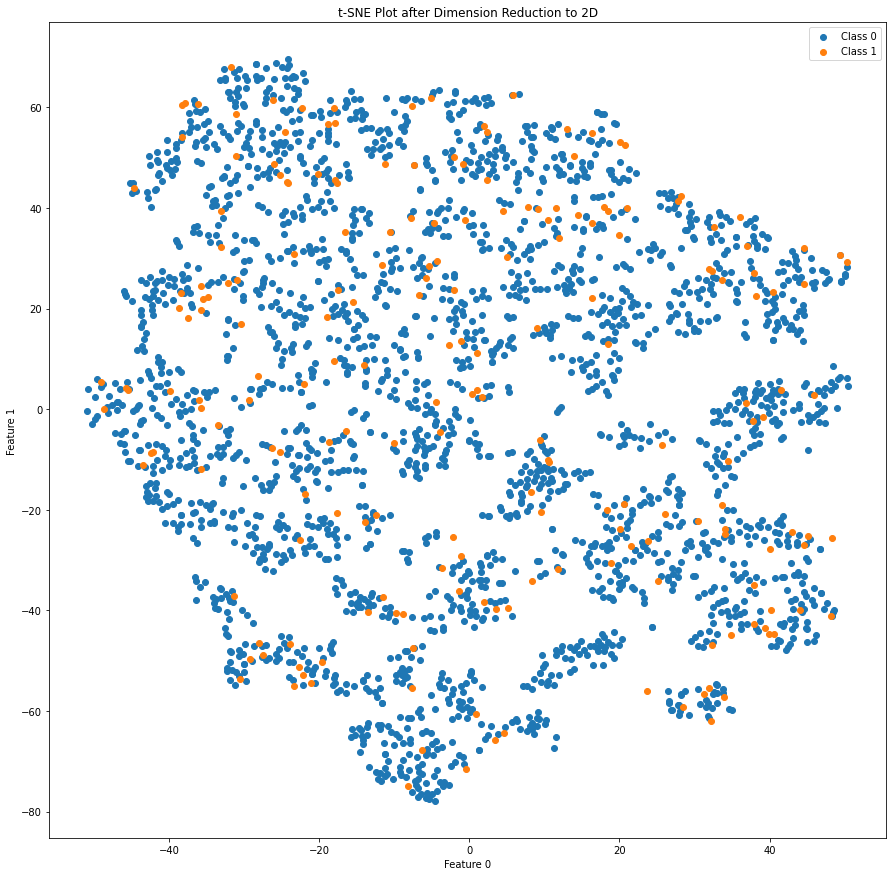



***BEST***


FOLD = 1
[0.52994792 8.84782609]
Epoch 1/150
16/16 [==============================] - 2s 91ms/step - loss: 0.4228 - accuracy: 0.4978 - val_loss: 0.2564 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Model
INFO:tensorflow:Assets written to: Model/assets
Epoch 2/150
16/16 [==============================] - 1s 77ms/step - loss: 0.4236 - accuracy: 0.7310 - val_loss: 0.2504 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/150
16/16 [==============================] - 1s 78ms/step - loss: 0.3915 - accuracy: 0.7851 - val_loss: 0.2504 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/150
16/16 [==============================] - 1s 77ms/step - loss: 0.4163 - accuracy: 0.8037 - val_loss: 0.2505 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/150
16/16 [==============================] - 1s 77ms/step - loss: 0.3948 - accur

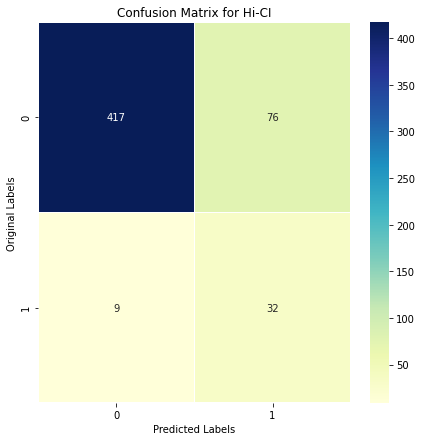

INFO:tensorflow:Assets written to: Model/assets
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_100 (Conv1D)          (None, 114, 32)           128       
_________________________________________________________________
dropout_160 (Dropout)        (None, 114, 32)           0         
_________________________________________________________________
conv1d_101 (Conv1D)          (None, 112, 32)           3104      
_________________________________________________________________
dropout_161 (Dropout)        (None, 112, 32)           0         
_________________________________________________________________
conv1d_102 (Conv1D)          (None, 110, 32)           3104      
_________________________________________________________________
dropout_162 (Dropout)        (None, 110, 32)           0         
_________________________________________________________________
max_p

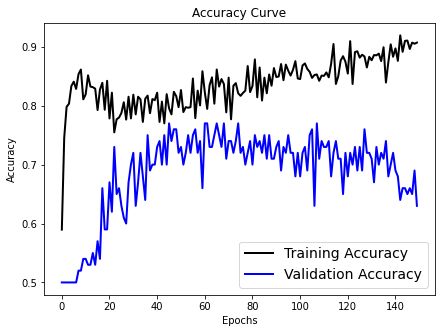

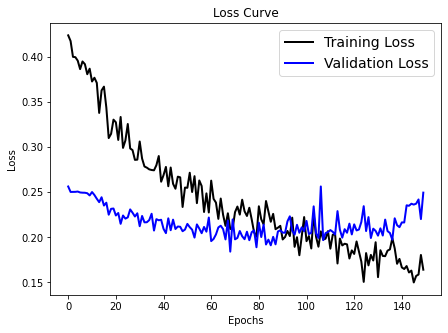

FOLD = 2
[0.52994792 8.84782609]
Epoch 1/150
16/16 [==============================] - 2s 93ms/step - loss: 0.4568 - accuracy: 0.5343 - val_loss: 0.2560 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Model
INFO:tensorflow:Assets written to: Model/assets
Epoch 2/150
16/16 [==============================] - 1s 81ms/step - loss: 0.4645 - accuracy: 0.6962 - val_loss: 0.2506 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/150
16/16 [==============================] - 1s 78ms/step - loss: 0.4028 - accuracy: 0.7107 - val_loss: 0.2498 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/150
16/16 [==============================] - 1s 79ms/step - loss: 0.3768 - accuracy: 0.7588 - val_loss: 0.2500 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/150
16/16 [==============================] - 1s 78ms/step - loss: 0.3748 - accuracy: 0.8195 - v

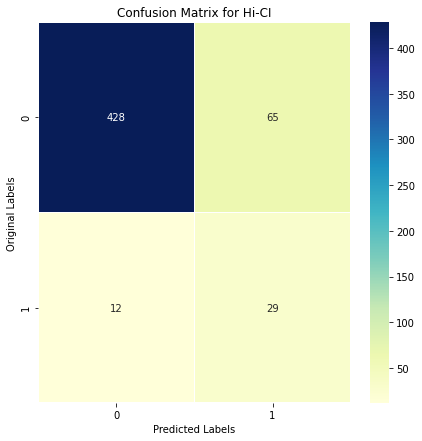

INFO:tensorflow:Assets written to: Model/assets
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_105 (Conv1D)          (None, 114, 32)           128       
_________________________________________________________________
dropout_168 (Dropout)        (None, 114, 32)           0         
_________________________________________________________________
conv1d_106 (Conv1D)          (None, 112, 32)           3104      
_________________________________________________________________
dropout_169 (Dropout)        (None, 112, 32)           0         
_________________________________________________________________
conv1d_107 (Conv1D)          (None, 110, 32)           3104      
_________________________________________________________________
dropout_170 (Dropout)        (None, 110, 32)           0         
_________________________________________________________________
max_p

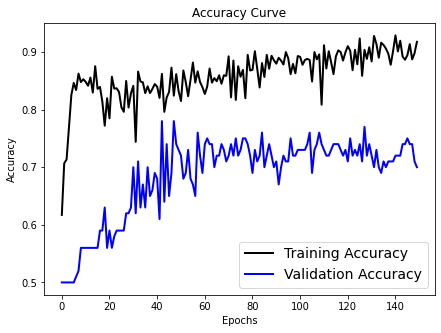

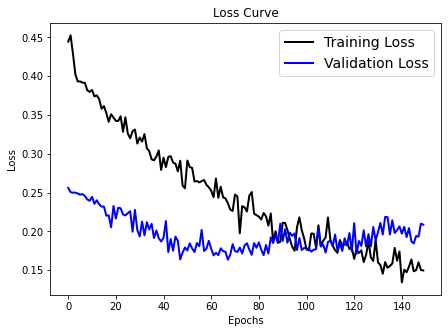

FOLD = 3
[0.52994792 8.84782609]
Epoch 1/150
16/16 [==============================] - 2s 96ms/step - loss: 0.4354 - accuracy: 0.5735 - val_loss: 0.2556 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Model
INFO:tensorflow:Assets written to: Model/assets
Epoch 2/150
16/16 [==============================] - 1s 80ms/step - loss: 0.4313 - accuracy: 0.7532 - val_loss: 0.2524 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/150
16/16 [==============================] - 1s 81ms/step - loss: 0.4238 - accuracy: 0.7916 - val_loss: 0.2506 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/150
16/16 [==============================] - 1s 79ms/step - loss: 0.4379 - accuracy: 0.8121 - val_loss: 0.2506 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/150
16/16 [==============================] - 1s 79ms/step - loss: 0.4155 - accuracy: 0.8657 - v

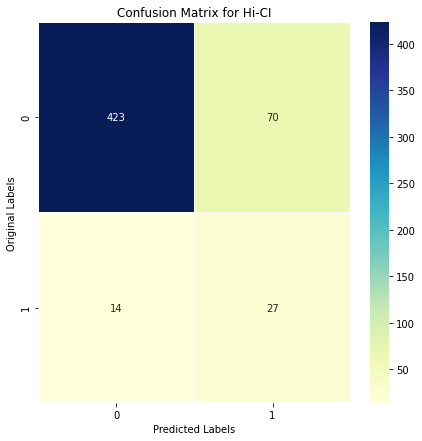

INFO:tensorflow:Assets written to: Model/assets
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_110 (Conv1D)          (None, 114, 32)           128       
_________________________________________________________________
dropout_176 (Dropout)        (None, 114, 32)           0         
_________________________________________________________________
conv1d_111 (Conv1D)          (None, 112, 32)           3104      
_________________________________________________________________
dropout_177 (Dropout)        (None, 112, 32)           0         
_________________________________________________________________
conv1d_112 (Conv1D)          (None, 110, 32)           3104      
_________________________________________________________________
dropout_178 (Dropout)        (None, 110, 32)           0         
_________________________________________________________________
max_p

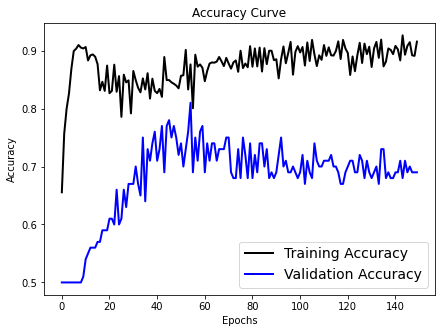

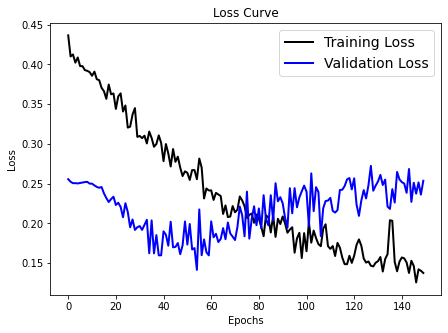

FOLD = 4
[0.52991675 8.85652174]
Epoch 1/150
16/16 [==============================] - 2s 94ms/step - loss: 0.4817 - accuracy: 0.4699 - val_loss: 0.2532 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Model
INFO:tensorflow:Assets written to: Model/assets
Epoch 2/150
16/16 [==============================] - 1s 81ms/step - loss: 0.4192 - accuracy: 0.7046 - val_loss: 0.2514 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/150
16/16 [==============================] - 1s 82ms/step - loss: 0.4193 - accuracy: 0.7427 - val_loss: 0.2503 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/150
16/16 [==============================] - 1s 82ms/step - loss: 0.4048 - accuracy: 0.7690 - val_loss: 0.2504 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/150
16/16 [==============================] - 1s 83ms/step - loss: 0.3798 - accuracy: 0.8668 - v

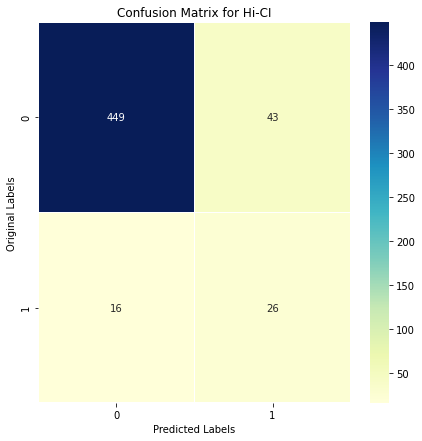

INFO:tensorflow:Assets written to: Model/assets
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_115 (Conv1D)          (None, 114, 32)           128       
_________________________________________________________________
dropout_184 (Dropout)        (None, 114, 32)           0         
_________________________________________________________________
conv1d_116 (Conv1D)          (None, 112, 32)           3104      
_________________________________________________________________
dropout_185 (Dropout)        (None, 112, 32)           0         
_________________________________________________________________
conv1d_117 (Conv1D)          (None, 110, 32)           3104      
_________________________________________________________________
dropout_186 (Dropout)        (None, 110, 32)           0         
_________________________________________________________________
max_p

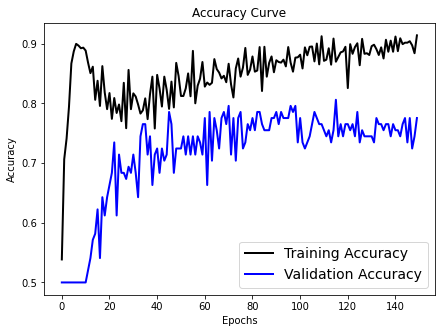

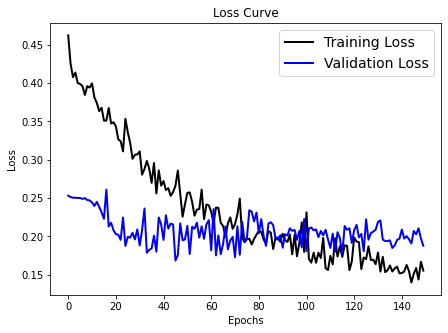

FOLD = 5
[0.52993233 8.85217391]
Epoch 1/150
16/16 [==============================] - 3s 96ms/step - loss: 0.4675 - accuracy: 0.8577 - val_loss: 0.2543 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to Model
INFO:tensorflow:Assets written to: Model/assets
Epoch 2/150
16/16 [==============================] - 1s 83ms/step - loss: 0.4789 - accuracy: 0.8469 - val_loss: 0.2504 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/150
16/16 [==============================] - 1s 81ms/step - loss: 0.4128 - accuracy: 0.8019 - val_loss: 0.2494 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/150
16/16 [==============================] - 1s 82ms/step - loss: 0.4213 - accuracy: 0.8497 - val_loss: 0.2497 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/150
16/16 [==============================] - 1s 81ms/step - loss: 0.4029 - accuracy: 0.8449 - v

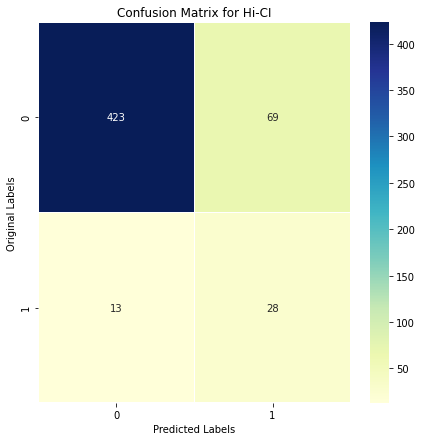

INFO:tensorflow:Assets written to: Model/assets
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_120 (Conv1D)          (None, 114, 32)           128       
_________________________________________________________________
dropout_192 (Dropout)        (None, 114, 32)           0         
_________________________________________________________________
conv1d_121 (Conv1D)          (None, 112, 32)           3104      
_________________________________________________________________
dropout_193 (Dropout)        (None, 112, 32)           0         
_________________________________________________________________
conv1d_122 (Conv1D)          (None, 110, 32)           3104      
_________________________________________________________________
dropout_194 (Dropout)        (None, 110, 32)           0         
_________________________________________________________________
max_p

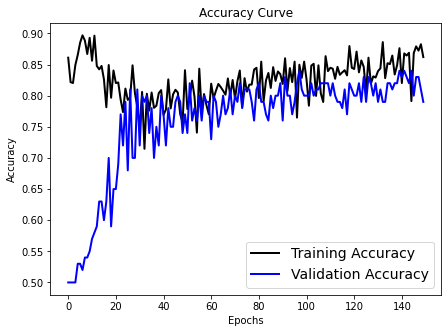

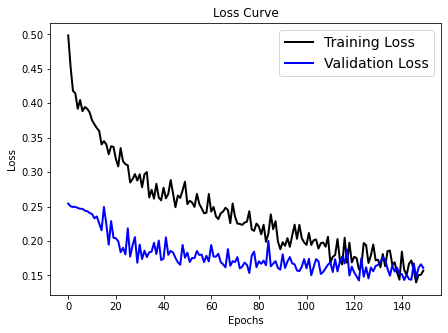

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
%matplotlib inline
class Insightx(object):
    def __init__(self,**kwargs):
        print('\n\n***INSIGHTS INITIALIZATION***\n\n')
        self.__data_set=kwargs['data']
        self.__data_set=self.__data_set.sort_values(by=[kwargs['id']],ignore_index=True)
        self.__targets=self.__data_set[kwargs['target_column']]
        for i in self.__data_set.columns:
            if isinstance(self.__data_set[i][0],str)==True:
                self.__data_set[i]=preprocessing.LabelEncoder().fit_transform(self.__data_set[i])
        self.__treatments=self.__data_set[kwargs['treatment']]
        self.__covariates=self.__data_set.drop(kwargs['treatment']+[kwargs['id']]+[kwargs['target_column']],axis='columns')
    def visualize(self):
        features=pd.concat([self.__covariates,self.__treatments],axis='columns').to_numpy()
        targets=self.__targets.to_numpy()
        embedded_features=TSNE(n_components=2).fit_transform(features)
        label=np.unique(targets)
        index=[[0]]*len(label)
        for j in label:
            index[j]=[i for i,x in enumerate(targets) if x==j]
        for i in range(0,len(label)):
            plt.scatter(embedded_features[index[i],0],embedded_features[index[i],1],label='Class %s' %targets[index[i]][0])
        plt.legend()
        plt.gcf().set_size_inches((15,15))
        plt.xlabel('Feature 0')
        plt.ylabel('Feature 1')
        plt.title('t-SNE Plot after Dimension Reduction to 2D')
        plt.show()
    def baseline(self,with_imbalance=False):
        print('\n\n***BASELINES***\n\n')
        features=pd.concat([self.__covariates,self.__treatments],axis='columns')
        features=StandardScaler().fit_transform(features)
        values=set(self.__targets.values.tolist())
        minimum=self.__targets.shape[0]
        classx=0
        for v in values:
            c=self.__targets.values.tolist().count(v)
            if c<minimum:
                minimum=c
                classx=v
        training_features,testing_features,training_targets,testing_targets=split(features=features,targets=self.__targets,test_percentage=35,classx=classx)
        if with_imbalance==False:
            training_features,training_targets=SMOTEENN(ratio='minority',random_state=0,smote=imblearn.over_sampling.SMOTE(random_state=0,sampling_strategy=0.7,k_neighbors=37),enn=imblearn.under_sampling.EditedNearestNeighbours(random_state=0,sampling_strategy='majority',n_neighbors=22,kind_sel='mode')).fit_resample(training_features,training_targets)
        DT=DecisionTreeClassifier().fit(training_features,training_targets)
        performance(testing_targets,DT.predict(testing_features),'Decision Tree')
        kNN=KNeighborsClassifier().fit(training_features,training_targets)
        performance(testing_targets,kNN.predict(testing_features),'k Nearest Neighbors')
        SVM=SVC().fit(training_features,training_targets)
        performance(testing_targets,SVM.predict(testing_features),'Support Vector Machine')
        LR=LogisticRegression().fit(training_features,training_targets)
        performance(testing_targets,LR.predict(testing_features),'Logistic Regression')
        # MLPC=dl_toolkit.MLPClassifier(layers=[116,200,50,2],Num_epochs=100,activation_function='tanh',learning_rate=0.01,optimizer='adam',lamda=0.01,dropout=0.2,Weight_init='xavier')
        # MLPC.fit(training_features,training_targets,testing_features,testing_targets)
        # performance(testing_targets,MLPC.predict(testing_features),'Deep Neural Network')
    def HiCI(self,encoding_dimension,with_imbalance=False,k_fold=5):
        print('\n\n***BEST***\n\n')
        #self.__covariates=pd.DataFrame(PCA(n_components=55).fit_transform(self.__covariates))
        features=pd.concat([self.__covariates,self.__treatments],axis='columns').to_numpy()
        targets=self.__targets.to_numpy()
        values=set(targets.tolist())
        minimum=targets.shape[0]
        classx=0
        for v in values:
            c=targets.tolist().count(v)
            if c<minimum:
                minimum=c
                classx=v
        skf=StratifiedKFold(n_splits=5,shuffle=True)
        fold=1
        for train_index,test_index in skf.split(features,targets):
            print('FOLD =',fold)
            fold+=1
            training_features,testing_features=features[train_index],features[test_index]
            training_targets,testing_targets=targets[train_index],targets[test_index]
            training_features,validation_features,training_targets,validation_targets=split(features=training_features,targets=training_targets,test_percentage=30,classx=classx)
            #training_features,validation_features,training_targets,validation_targets=train_test_split(training_features,training_targets,test_size=0.25,stratify=training_targets)
            # if with_imbalance==False:
            #     training_features,training_targets=SMOTEENN(ratio='minority',random_state=0,smote=imblearn.over_sampling.SMOTE(random_state=0,sampling_strategy=0.7,k_neighbors=37),enn=imblearn.under_sampling.EditedNearestNeighbours(random_state=0,sampling_strategy='majority',n_neighbors=22,kind_sel='mode')).fit_resample(training_features,training_targets)
            scaler=StandardScaler()
            scaler.fit(training_features)
            training_features=scaler.transform(training_features)
            validation_features=scaler.transform(validation_features)
            testing_features=scaler.transform(testing_features)
            training_features=training_features.reshape(training_features.shape[0],training_features.shape[1],1)
            validation_features=validation_features.reshape(validation_features.shape[0],validation_features.shape[1],1)
            testing_features=testing_features.reshape(testing_features.shape[0],testing_features.shape[1],1)
            cw=class_weight.compute_class_weight('balanced',np.unique(training_targets),training_targets)
            print(cw)
            NN=keras.models.Sequential([keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu',input_shape=(training_features.shape[1],1)),
                                        keras.layers.Dropout(rate=0.2),
                                        keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu'),
                                        keras.layers.Dropout(rate=0.2),
                                        keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu'),
                                        keras.layers.Dropout(rate=0.2),
                                        keras.layers.MaxPooling1D(pool_size=3),
                                        keras.layers.Conv1D(filters=64,kernel_size=3,activation='relu'),
                                        keras.layers.Dropout(rate=0.2),
                                        keras.layers.Conv1D(filters=64,kernel_size=3,activation='relu'),
                                        keras.layers.Dropout(rate=0.2),
                                        keras.layers.MaxPooling1D(pool_size=3),
                                        # keras.layers.Conv1D(filters=128,kernel_size=3,activation='relu'),
                                        # keras.layers.Dropout(rate=0.2),
                                        # keras.layers.MaxPooling1D(pool_size=3),
                                        keras.layers.Flatten(),
                                        keras.layers.Dense(units=300,activation='relu'),
                                        keras.layers.Dropout(rate=0.65),
                                        keras.layers.Dense(units=100,activation='relu'),
                                        keras.layers.Dropout(rate=0.65),
                                        keras.layers.Dense(units=20,activation='relu'),
                                        keras.layers.Dropout(rate=0.65),
                                        keras.layers.Dense(units=2,activation='softmax')])
            NN.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
            history=NN.fit(x=training_features,
                    y=keras.utils.to_categorical(training_targets),
                    epochs=150,
                    batch_size=128,
                    shuffle=True,
                    class_weight={0:1,1:12},
                    callbacks=[keras.callbacks.ModelCheckpoint('Model',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)],
                    validation_data=(validation_features,keras.utils.to_categorical(validation_targets)))
            NN=keras.models.load_model('Model')
            NN.evaluate(testing_features,keras.utils.to_categorical(testing_targets))
            predicted=np.argmax(NN.predict(testing_features),axis=1)
            performance(testing_targets,np.argmax(NN.predict(testing_features),axis=1),'Hi-CI')
            NN.save('Model')
            NN.summary()
            print(classification_report(testing_targets,predicted,target_names=['Class: Alive','Class: Expired']))
            plotting_epochs(history.history['accuracy'],history.history['val_accuracy'],'Accuracy')
            plotting_epochs(history.history['loss'],history.history['val_loss'],'Loss')
    def profile(self,title,file):
        print('\n\n***PANDAS PROFILING***\n\n')
        self.__profile=pandas_profiling.ProfileReport(self.__data_set,title=title)
        self.__profile.to_file(output_file=file)
def split(features,targets,test_percentage,classx):
    training_features=[]
    testing_features=[]
    training_targets=[]
    testing_targets=[]
    to_sample=round(targets.tolist().count(classx)*test_percentage/100)
    labels=list(set(targets.tolist()))
    class_count=len(labels)
    indices=[[] for i in range(class_count)]
    for i in range(targets.shape[0]):
        for j in range(len(labels)):
            if targets[i]==labels[j]:
                indices[j].append(i)
    test_samples=[]
    for i in range(len(labels)):
        test_samples=test_samples+sample(indices[i],to_sample)
    test_samples=set(test_samples)
    for i in range(targets.shape[0]):
        if i in test_samples:
            testing_features.append(features[i])
            testing_targets.append(targets[i])
        else:
            training_features.append(features[i])
            training_targets.append(targets[i])
    training_features=np.array(training_features)
    testing_features=np.array(testing_features)
    training_targets=np.array(training_targets)
    testing_targets=np.array(testing_targets)
    return training_features,testing_features,training_targets,testing_targets
def performance(testing_targets,predicted,model):
    print('\n\nMacro F1 for',model,'=',f1_score(testing_targets,predicted,average='macro'))
    print('\n\nMicro F1 for',model,'=',f1_score(testing_targets,predicted,average='micro'))
    plt.figure(figsize=(7,7))
    sn.heatmap(confusion_matrix(testing_targets,predicted),annot=True,fmt='d',cmap='YlGnBu',linewidths=0.5)
    plt.title('Confusion Matrix for {0}'.format(model))
    plt.xlabel('Predicted Labels')
    plt.ylabel('Original Labels')
    plt.show()
def plotting_epochs(training_,validation_,lossOrAccu):
    plt.figure(figsize=[7,5])
    plt.plot(training_,'black',linewidth=2.0)
    plt.plot(validation_,'blue',linewidth=2.0)
    plt.legend(['Training '+lossOrAccu,'Validation '+lossOrAccu],fontsize=14)
    plt.xlabel('Epochs',fontsize=10)
    plt.ylabel(lossOrAccu,fontsize=10)
    plt.title(lossOrAccu+' Curve',fontsize=12)
    plt.show()
drive.mount("/content/gdrive",force_remount=True)
warnings.filterwarnings('ignore')
data=pd.read_csv('/content/gdrive/MyDrive/PGM Data Folder/Project_Master_sheet_modified_Feb25_2021.csv')
I_master=Insightx(data=data,id='patient_UID',target_column='30_days_Mortality',treatment=['AtH_ASPIRIN','AtH_STATIN','AtH_P2Y12_Inhibitors_Clopidogrel','AtH_P2Y12_Inhibitors_Ticagrelor','AtH_P2Y12_Inhibitors_Prasugrel','AtH_Beta_blocker','AtH_Channel_Blocker','AtH_Thrombolytic'])
I_master.visualize()
I_master.HiCI(encoding_dimension=40,with_imbalance=False,k_fold=5)